<a href="https://colab.research.google.com/github/jan-kreischer/UZH_Network-Science_Final-Project/blob/main/Jan/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install EoN

     |████████████████████████████████| 113 kB 8.7 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=5f2a1d24508f36f893a8a834b4858940164409d4cc5151f8c495442b11be3613
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import networkx as nx

In [ ]:
from google.colab import drive
mountpoint = '/content/drive'
drive.mount(mountpoint, force_remount=True)

Mounted at /content/drive


In [ ]:
# Change location into the folder containing the data
# You need to adapt this to your respective path
%cd "/content/drive/My Drive/UZH_Network-Science/Projects/Final-Project/Jan/data/"

/content/drive/My Drive/UZH_Network-Science/Projects/Final-Project/Jan/data


In [ ]:
facebook_graph = nx.read_gml("facebook_graph.gml")

In [ ]:
escort_graph = nx.read_gml("escort_graph.gml")

doing Gillespie simulation
done with simulation, now plotting


(<matplotlib.axes._subplots.AxesSubplot at 0x7fed5bd60790>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fed5e26a410>])

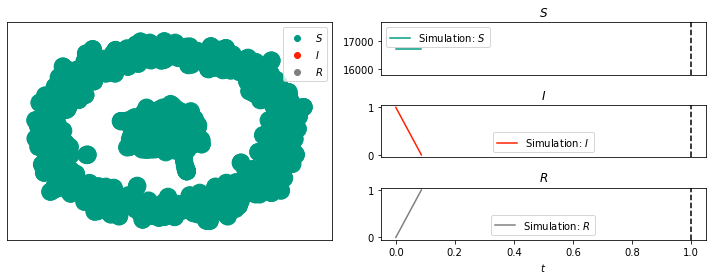

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
G = nx.karate_club_graph()
nx_kwargs = {"with_labels":True} #optional arguments to be passed on to the #networkx plotting command.
print('doing Gillespie simulation')
sim = EoN.Gillespie_SIR(G, 1, 1, return_full_data=True)
print('done with simulation, now plotting')
sim.display(time = 1) #plot at time 1. plt.show()

In [ ]:
https://python.plainenglish.io/visualizing-dynamic-phenomena-with-sir-model-and-networks-45a4e629e609
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0240878%

In [ ]:
import EoN

gamma = 0.2  
beta = 1.2 
r_0 = beta/gamma
print(r_0)
N = 100 # population size
I0 = 1   # intial n° of infected individuals 
R0 = 0
S0 = N - I0 -R0
pos = nx.spring_layout(escort_graph)
nx_kwargs = {"pos": pos, "alpha": 0.7} #optional arguments to be passed on to the
#x_kwargs = {"with_labels":True, "pos": pos, "width": edgewidth, "alpha": 0.7} #optional arguments to be passed on to the
#networkx plotting command.
print("doing Gillespie simulation")
sim = EoN.Gillespie_SIR(escort_graph, tau = beta, gamma=gamma, rho = I0/N, transmission_weight="weight", return_full_data=True)
print("done with simulation, now plotting")
for i in range(0,10,1):
    sim.display(time = i,  **nx_kwargs)
    plt.axis('off') 
    plt.title("Iteration {}".format(i))
    plt.draw()

5.999999999999999


KeyboardInterrupt: ignored

doing Gillespie simulation
done with simulation, now plotting


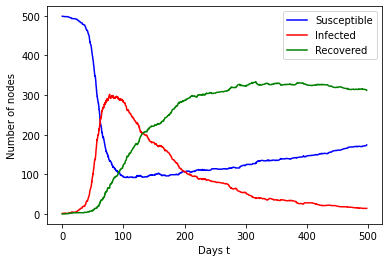

In [ ]:
# Source: https://stackoverflow.com/questions/65378617/sirs-model-with-agents-on-networkx

import networkx as nx
import matplotlib.pyplot as plt 
import EoN
from collections import defaultdict

# parameters required for the SIRS model
a = 0.1
b = 0.01
y = 0.001
d = 0.001

# Simple contagions
# the below is based on an example of a SEIR disease (there is an exposed state before becoming infectious)
# from https://arxiv.org/pdf/2001.02436.pdf

Gnp = nx.gnp_random_graph(500, 0.005)

H = nx.DiGraph() #For the spontaneous transitions
H.add_edge('I', 'R', rate = b)  # an infected node can be recovered/removed
H.add_edge('I', 'S', rate = y)  # an infected node can become susceptible again
H.add_edge('R', 'S', rate = d)  # a recovered node can become suscepticle again

J = nx.DiGraph() #for the induced transitions
J.add_edge(('I', 'S'),('I', 'I'), rate = a)  # a susceptible node can become infected from a neighbour
IC = defaultdict(lambda: 'S')

# set all statuses except one to susceptible. only one node shall begin infected
for node in range(500):
    IC[node] = 'S'
IC[0] = 'I'

return_statuses = ('S', 'I', 'R')
print('doing Gillespie simulation')

t, S, I, R = EoN.Gillespie_simple_contagion(Gnp, H, J, IC, return_statuses, tmax = 500)

print('done with simulation, now plotting')
plt.plot(t, S, label = 'Susceptible', color="b")
plt.plot(t, I, label = 'Infected', color="r")
plt.plot(t, R, label = 'Recovered', color="g")
#plt.plot(t, R+I, label = 'Non Susceptible', color="y")

plt.xlabel('Days t')
plt.ylabel('Number of nodes')
plt.legend()
plt.show()

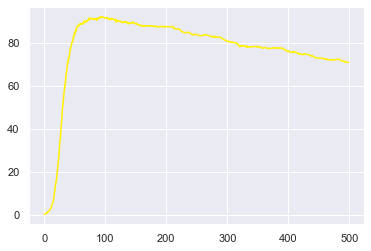

In [ ]:
H = 0.21*(R + I) # Cumulative hospitalized patients

plt.plot(t, H, label = 'Hospitalized', color="")

<AxesSubplot:>

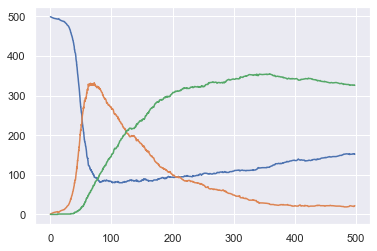

In [ ]:
sns.set_theme()
sns.lineplot(x=t, y=S)
sns.lineplot(x=t, y=I)
sns.lineplot(x=t, y=R)

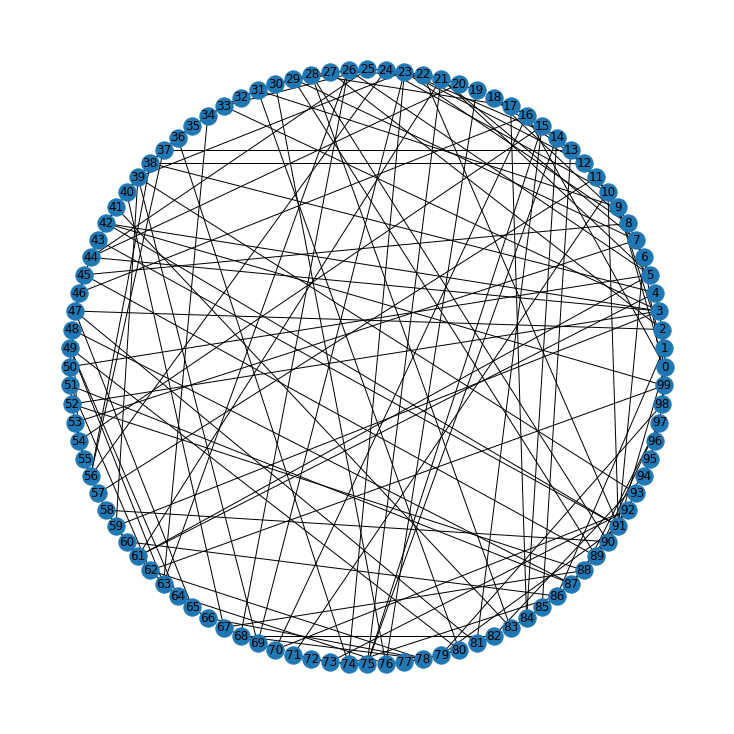

In [ ]:
# Source: https://python.plainenglish.io/visualizing-dynamic-phenomena-with-sir-model-and-networks-45a4e629e609
import networkx as nx
# n... number of nodes.
# k... each node is connected to its k nearest neigbours in ring topology.
# p... the probability of rewiring each edge.
g=nx.watts_strogatz_graph(n=100, k=4, p=0.6)
plt.figure(figsize=(10,10))
nx.draw_circular(g, with_labels = True)

(-1.152856730232391,
 0.9326932622745292,
 -1.0199274957481652,
 1.1919388118131742)

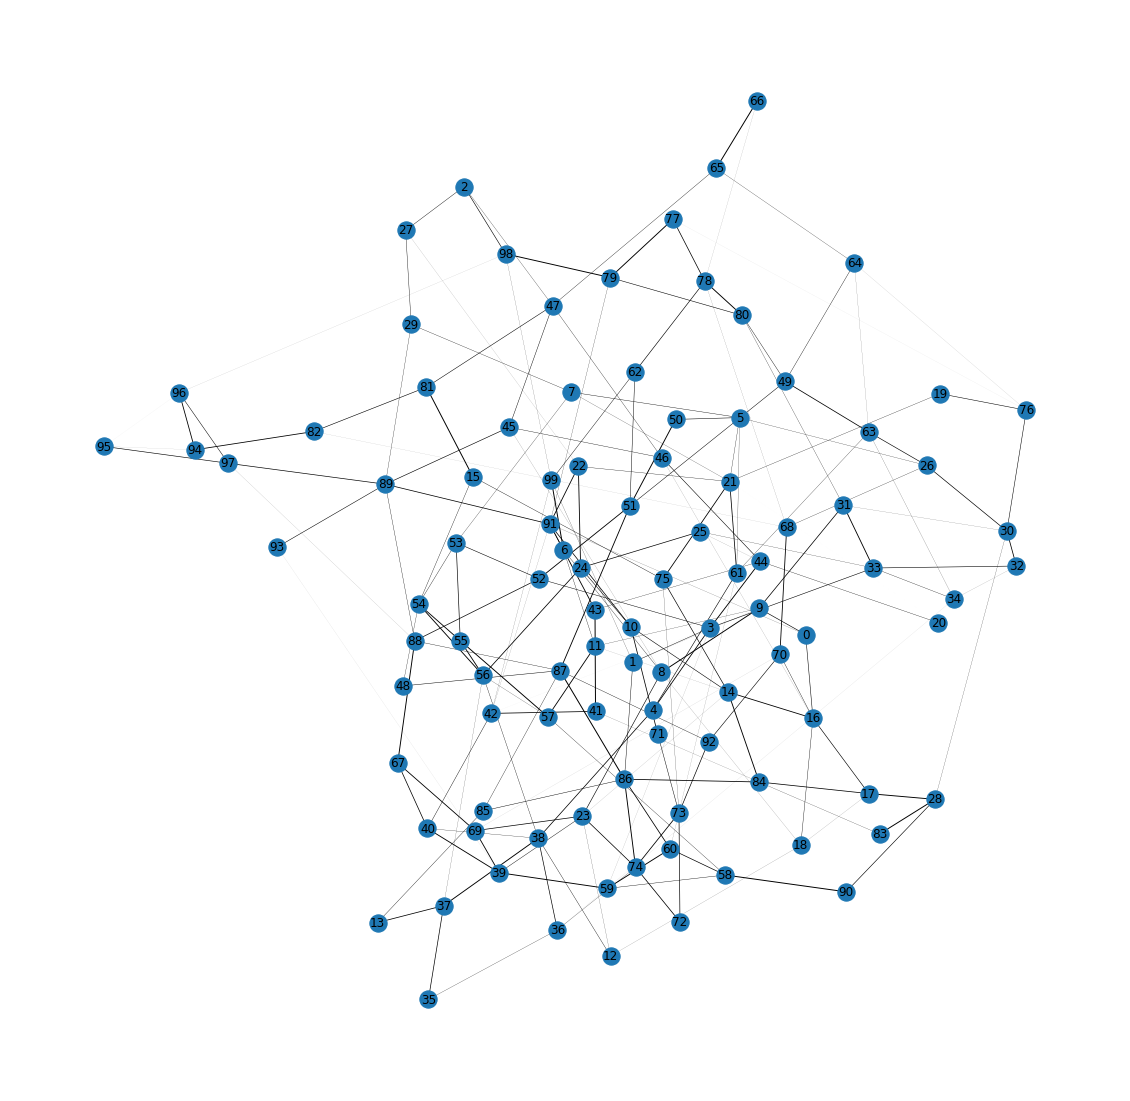

In [ ]:
import random
E = g.number_of_edges()
#initializing random weights
w = [random.random() for i in range(E)]
s = max(w)
w = [ i/s for i in w ] #normalizing
len(w)
k = 0
for i, j in g.edges():
    g[i][j]['weight'] = w[k]
    k+=1
import matplotlib.pyplot as plt
edgewidth = [d['weight'] for (u,v,d) in g.edges(data=True)]
# layout
#pos = nx.spring_layout(G, iterations=50)
pos = nx.spring_layout(g)
labels = {}
for i in range(100):
    labels[i] = i
# rendering
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, width=edgewidth, node_size=500)
nx.draw_networkx_labels(g, pos, labels)
plt.axis('off')

5.999999999999999
doing Gillespie simulation
done with simulation, now plotting


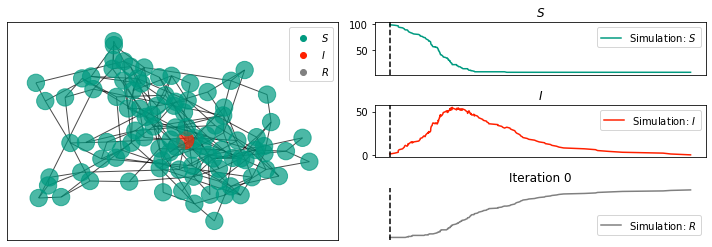

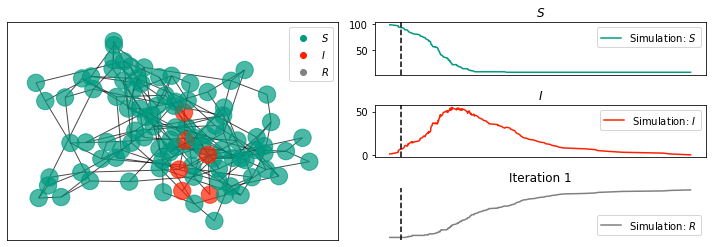

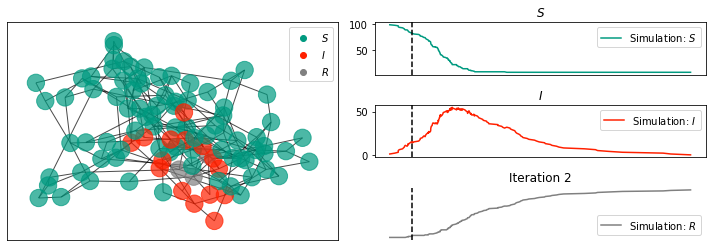

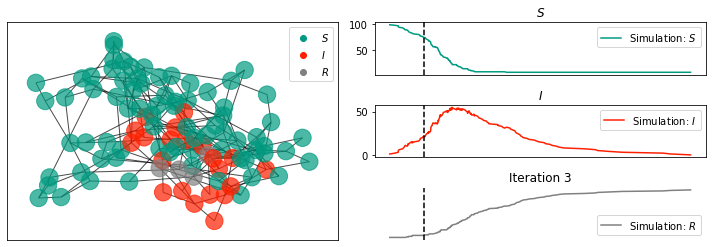

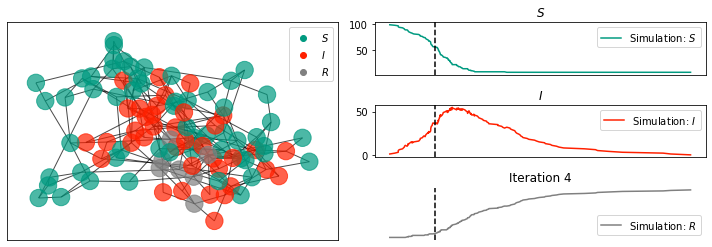

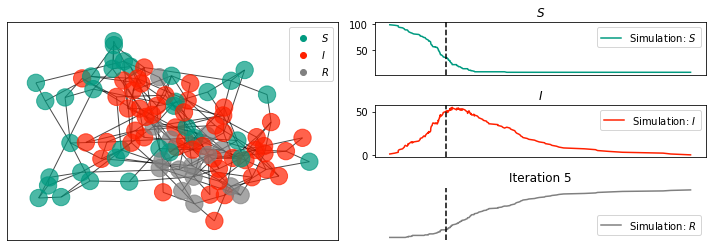

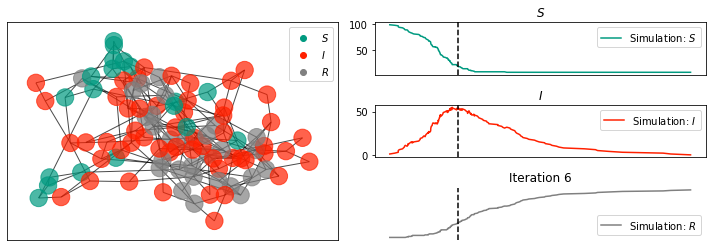

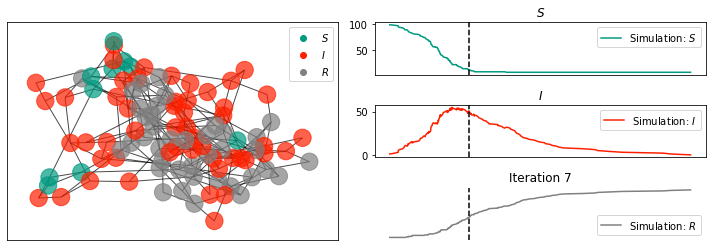

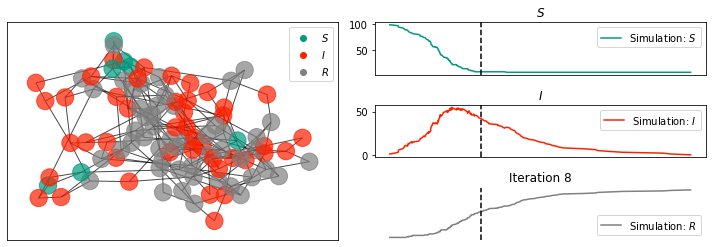

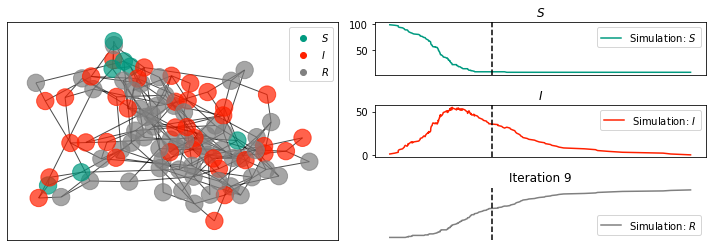

In [ ]:
import EoN
gamma = 0.2  
beta = 1.2 
r_0 = beta/gamma
print(r_0)
N = 100 # population size
I0 = 1   # intial n° of infected individuals 
R0 = 0
S0 = N - I0 -R0
pos = nx.spring_layout(g)
nx_kwargs = {"pos": pos, "alpha": 0.7} #optional arguments to be passed on to the
#x_kwargs = {"with_labels":True, "pos": pos, "width": edgewidth, "alpha": 0.7} #optional arguments to be passed on to the
#networkx plotting command.
print("doing Gillespie simulation")
sim = EoN.Gillespie_SIR(g, tau = beta, gamma=gamma, rho = I0/N, transmission_weight="weight", return_full_data=True)
print("done with simulation, now plotting")
for i in range(0,10,1):
    sim.display(time = i,  **nx_kwargs)
    plt.axis('off') 
    plt.title("Iteration {}".format(i))
    plt.draw()

generating graph G with 1000000 nodes
doing event-based simulation
doing Gillespie simulation
done with simulations, now plotting


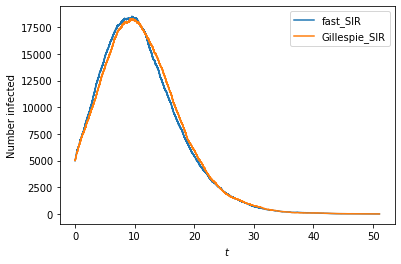

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
N = 10**6 #number of individuals
kave = 5 #expected number of partners
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, kave/(N-1)) #Erdo''s-Re'nyi graph
rho = 0.005
tau = 0.3
gamma = 1.0
#initial fraction infected
#transmission rate
#recovery rate
print('doing event-based simulation')
t1, S1, I1, R1 = EoN.fast_SIR(G, tau, gamma, rho=rho)
#instead of rho, we could specify a list of nodes as initial_infecteds, or #specify neither and a single random node would be chosen as the index case.
print('doing Gillespie simulation')
t2, S2, I2, R2 = EoN.Gillespie_SIR(G, tau, gamma, rho=rho)
print('done with simulations, now plotting')
plt.plot(t1, I1, label = 'fast_SIR')
plt.plot(t2, I2, label = 
         'Gillespie_SIR')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

generating graph G with 100000 nodes
doing Event-driven simulation
doing Gillespie simulation
done with simulations, now plotting


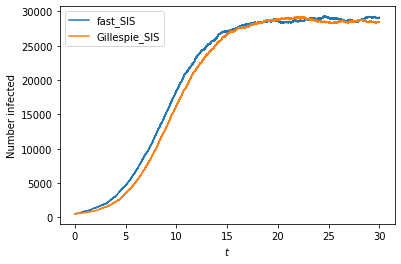

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
4
N = 10**5 #number of individuals
kave = 5 #expected number of partners
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, kave/(N-1)) #Erdo''s-Re'nyi graph
rho = 0.005 #initial fraction infected
tau = 0.3 #transmission rate
gamma = 1.0 #recovery rate
print('doing Event-driven simulation')
t1, S1, I1 = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax = 30) 
print('doing Gillespie simulation')
t2, S2, I2 = EoN.Gillespie_SIS(G, tau, gamma, rho=rho, tmax = 30)
print('done with simulations, now plotting')
plt.plot(t1, I1, label = 'fast_SIS')
plt.plot(t2, I2, label = 'Gillespie_SIS')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

generating graph G with 1000000 nodes
0
doing Event-driven simulation
done with simulation, now plotting
1
doing Event-driven simulation
done with simulation, now plotting
2
doing Event-driven simulation
done with simulation, now plotting
3
doing Event-driven simulation
done with simulation, now plotting
4
doing Event-driven simulation
done with simulation, now plotting
5
doing Event-driven simulation
done with simulation, now plotting
6
doing Event-driven simulation
done with simulation, now plotting
7
doing Event-driven simulation
done with simulation, now plotting
8
doing Event-driven simulation
done with simulation, now plotting
9
doing Event-driven simulation
done with simulation, now plotting


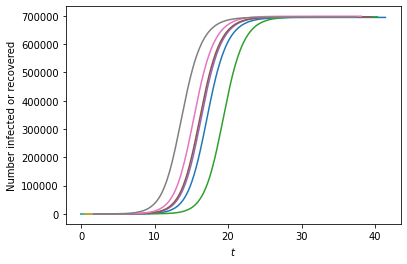

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np
def rec_time_fxn_gamma(u):
    return np.random.gamma(3, 0.5) #gamma distributed random number

def trans_time_fxn(u, v, tau):
    if tau >0:
        return np.random.exponential(1./tau)
    else:
        return float('Inf')
N = 10**6 #number of individuals
kave = 5 #expected number of partners
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, kave/(N-1)) #Erdo''s-Re'nyi graph tau = 0.3
for cntr in range(10):
    print(cntr)
    print('doing Event-driven simulation')
    t, S, I, R = EoN.fast_nonMarkov_SIR(G, trans_time_fxn = trans_time_fxn,
                                        rec_time_fxn = rec_time_fxn_gamma,
                                        trans_time_args = (tau,))
    #To reduce file size and make plotting faster, we'll just plot 1000
    #data points.  It's not really needed here, but this demonstrates
    #one of the available tools in EoN.
    subsampled_ts = np.linspace(t[0], t[-1], 1000)
    subI, subR = EoN.subsample(subsampled_ts, t, I, R)
    print('done with simulation, now plotting')
    plt.plot(subsampled_ts, subI+subR)
plt.xlabel('$t$')
plt.ylabel('Number infected or recovered')
plt.show()

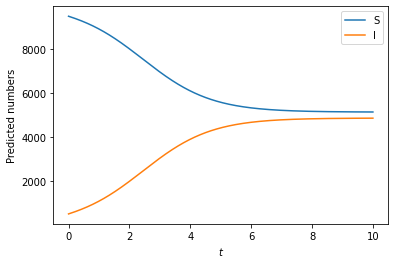

In [ ]:
import networkx as nx
import EoN
7
import matplotlib.pyplot as plt
N=10000
gamma = 1
rho = 0.05
kave = 20
tau = 2*gamma/ kave
S0 = (1-rho)*N
I0 = rho*N
SI0 = (1-rho)*kave*rho*N
SS0 = (1-rho)*kave*(1-rho)*N
t, S, I = EoN.SIS_homogeneous_pairwise(S0, I0, SI0, SS0, kave, tau, gamma,
tmax=10)
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.xlabel('$t$')
plt.ylabel('Predicted numbers')
plt.legend()
plt.show()

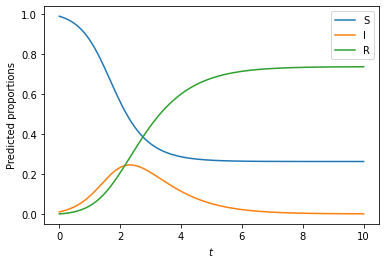

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np
gamma = 1
tau = 1.5
kave = 3
rho = 0.01
phiS0 = 1-rho
def psi(x):
    return (1-rho)* np.exp(-kave*(1-x))
def psiPrime(x):
    return (1-rho)*kave*np.exp(-kave*(1-x))
N=1
t, S, I, R = EoN.EBCM(N, psi, psiPrime, tau, gamma, phiS0, tmax = 10)
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.xlabel('$t$')
plt.ylabel('Predicted proportions')
plt.legend()
plt.show()

generating graph G with 100000 nodes
doing Gillespie simulation
done with simulation, now plotting


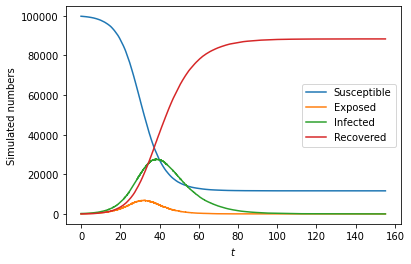

In [ ]:

import EoN
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import random
N = 100000
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, 5./(N-1))
#We add random variation in the rate of leaving exposed class
#and in the partnership transmission rate.
#There is no variation in recovery rate.
node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}
nx.set_node_attributes(G, values=node_attribute_dict,
                        name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict,
                        name='transmission_weight')
#
#These individual and partnership attributes will be used to scale
#the transition rates.  When we define \texttt{H} and \texttt{J}, we provide the name
#of these attributes.
#More advanced techniques to scale the transmission rates are shown in
#the online documentation
H = nx.DiGraph() #For the spontaneous transitions
H.add_node('S') #This line is actually unnecessary.
H.add_edge('E', 'I', rate = 0.6, weight_label='expose2infect_weight') 
H.add_edge('I', 'R', rate = 0.1)
J = nx.DiGraph() #for the induced transitions 
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.1, weight_label='transmission_weight')
IC = defaultdict(lambda: 'S')
for node in range(200):
    IC[node] = 'I'
return_statuses = ('S', 'E', 'I', 'R')
print('doing Gillespie simulation')
t, S, E, I, R = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses,
                                        tmax = float('Inf'))
print('done with simulation, now plotting')
plt.plot(t, S, label = 'Susceptible')
plt.plot(t, E, label = 'Exposed')
plt.plot(t, I, label = 'Infected')
plt.plot(t, R, label = 'Recovered')
plt.xlabel('$t$')
plt.ylabel('Simulated numbers')
plt.legend()
plt.show()

doing Gillespie simulation
done with simulation, now plotting


(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$'}>,
  <AxesSubplot:title={'center':'$I$'}>,
  <AxesSubplot:title={'center':'$R$'}, xlabel='$t$'>])

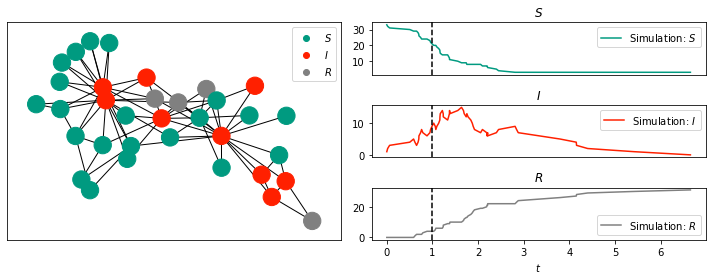

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
G = nx.karate_club_graph()
nx_kwargs = {"with_labels":True} #optional arguments to be passed on to the #networkx plotting command.
print('doing Gillespie simulation')
sim = EoN.Gillespie_SIR(G, 1, 1, return_full_data=True)
print('done with simulation, now plotting')
sim.display(time = 1) #plot at time 1. plt.show()

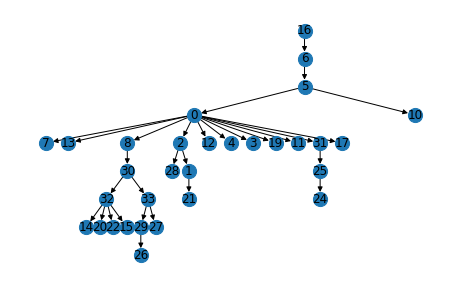

In [ ]:
T = sim.transmission_tree() #A networkx DiGraph with the transmission tree 
Tpos = EoN.hierarchy_pos(T) #pos for a networkx plot
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
nx.draw(T, Tpos, ax=ax, node_size = 200, with_labels=True)
plt.show()

generating graph Gc
doing Gillespie simulation


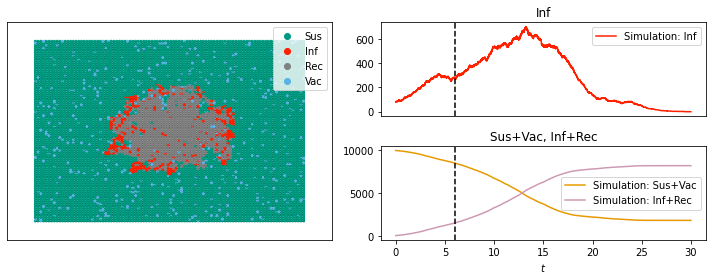

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from collections import defaultdict
print('generating graph Gc')
G = nx.grid_2d_graph(100,100) #each node is (u,v) where 0<=u,v<=99 #we'll initially infect those near the middle
initial_infections = [(u,v) for (u,v) in G if 45<u<55 and 45<v<55]
H = nx.DiGraph() #the spontaneous transitions 
H.add_edge('Sus', 'Vac', rate = 0.01)
H.add_edge('Vac', 'Sus', rate = 0.05) 
H.add_edge('Inf', 'Rec', rate = 1.0)
J = nx.DiGraph() #the induced transitions 
J.add_edge(('Inf', 'Sus'), ('Inf', 'Inf'), rate = 2.0)
#23
#The command hierarchy pos is based on [15].
#Example - Visualizing dynamics of SIR disease with vaccination.
IC = defaultdict(lambda:'Sus') #a "dict", but by default the value is \texttt{'Sus'}. 
for node in initial_infections:
    IC[node] = 'Inf'
    
return_statuses = ['Sus', 'Inf', 'Rec', 'Vac']
color_dict = {'Sus': '#009a80','Inf':'#ff2000', 'Rec':'gray','Vac': '#5AB3E6'}
pos = {node:node for node in G}
tex = False
sim_kwargs = {'color_dict':color_dict, 'pos':pos, 'tex':tex}
print('doing Gillespie simulation')
sim = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax=30, return_full_data=True, sim_kwargs=sim_kwargs)
times, D = sim.summary()
#
#times is a numpy array of times. D is a dict, whose keys are the entries in #return_statuses. The values are numpy arrays giving the number in that #status at the corresponding time.
newD = {'Sus+Vac':D['Sus']+D['Vac'], 'Inf+Rec' : D['Inf'] + D['Rec']}
#
#newD is a new dict giving number not yet infected or the number ever infected #Let's add this timeseries to the simulation.
#
new_timeseries = (times, newD)
sim.add_timeseries(new_timeseries, label = 'Simulation',
                    color_dict={'Sus+Vac':'#E69A00', 'Inf+Rec':'#CD9AB3'})
sim.display(time=6, node_size = 4, ts_plots=[['Inf'], ['Sus+Vac', 'Inf+Rec']])
plt.show()

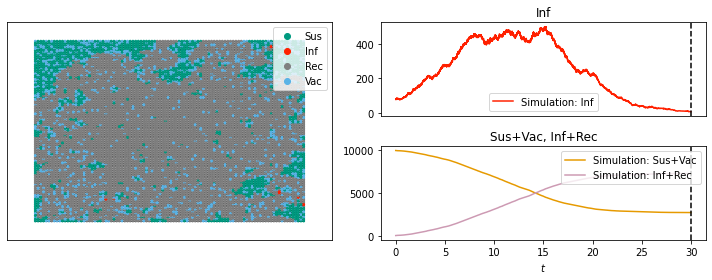

In [ ]:
ani=sim.animate(ts_plots=[['Inf'], ['Sus+Vac', 'Inf+Rec']], node_size = 4)
ani.save('SIRV_animate.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

## OpenData

In [ ]:
dataset_url = "https://www.covid19.admin.ch/api/data/20211027-weppzp5n/sources/COVID19VaccDosesAdministered_indication_w.json"
import urllib.request, json 
with urllib.request.urlopen(dataset_url) as url:
    data = json.loads(url.read().decode())
    print(data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
jsonurl = urllib.request.urlopen(dataset_url)
observations = json.loads(jsonurl.read())

In [ ]:
print(len(text))

10208


In [ ]:
print(type(text))

<class 'list'>


In [ ]:
print(text[100])

{'date': 202111, 'geoRegion': 'AG', 'indication': 'med_prof', 'entries': 1942, 'type_variant': 'indication', 'pop': 694072, 'sumTotal': 16194, 'freq': 0.184, 'prct': 18.4, 'prctSumTotal': 16.4, 'per100Persons': 0.28, 'per100PersonsTotal': 2.33, 'type': 'COVID19VaccDosesAdministered', 'version': '2021-10-27_08-03-17', 'granularity': 'detailed'}


In [ ]:
for observation in observations:
    print(observation['geoRegion'])

IndentationError: expected an indented block (705750604.py, line 1)

In [ ]:
daily_cases_url = "https://www.covid19.admin.ch/api/data/20211027-weppzp5n/sources/COVID19Cases_geoRegion_w.json"

In [ ]:
jsonurl = urllib.request.urlopen(daily_cases_url)
observations = json.loads(jsonurl.read())

import pandas as pd

df = pd.json_normalize(observations)
#print (df)
print(len(df))
df.head(5)

3132


,geoRegion,datum,entries,timeframe_all,timeframe_phase2,timeframe_phase2b,timeframe_phase3,timeframe_phase4,timeframe_vacc_info,timeframe_28d,...,inzsumTotal,type,type_variant,version,datum_unit,datum_dboardformated,entries_diff_abs,entries_diff_inz,entries_diff_pct,prct_diff
0,CH,202009,56,True,False,False,False,False,False,False,...,0.65,COVID19Cases,,2021-10-27_07-51-17,isoweek,2020-09,NaN,NaN,NaN,NaN
1,CH,202010,377,True,False,False,False,False,False,False,...,4.99,COVID19Cases,,2021-10-27_07-51-17,isoweek,2020-10,321.0,3.70,573.2,0.0
2,CH,202011,2265,True,False,False,False,False,False,False,...,31.12,COVID19Cases,,2021-10-27_07-51-17,isoweek,2020-11,1888.0,21.77,500.8,0.0
3,CH,202012,6559,True,False,False,False,False,False,False,...,106.77,COVID19Cases,,2021-10-27_07-51-17,isoweek,2020-12,4294.0,49.53,189.6,0.0
4,CH,202013,7346,True,False,False,False,False,False,False,...,191.49,COVID19Cases,,2021-10-27_07-51-17,isoweek,2020-13,787.0,9.08,12.0,0.0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx.algorithms.community as nxcom

In [ ]:
def quantify_graph(graph):
    number_of_nodes = graph.number_of_nodes()
    print("The graph has {} nodes and {} edges".format(number_of_nodes, number_of_edges))
    
    print("graph exploration")
    print(nx.is_weighted(graph))

In [ ]:
def visualize_graph(graph):
    

In [ ]:
def load_graph(graph_name):
    

In [ ]:
facebook_graph = nx.read_gml("data/graph_facebook.gml")

In [ ]:
quantify_graph(facebook_graph)

The graph has 4039 nodes
graph exploration
False


In [ ]:
facebook_graph.number_of_nodes()

4039

In [ ]:
facebook_graph.number_of_edges()

88234

In [ ]:
def plot_degree_distribution(deg, xscale='linear', yscale='linear', bins=20, density=True):
    fig, ax = plt.subplots()
    title = "Degree Distribution "

    if xscale == 'log':
        title+="Log"
        binlog = np.logspace(np.log10(min(deg)),np.log10(max(deg)), bins)
        plt.hist(deg, binlog, density = density, alpha=0.5)
        plt.xlabel('log k')
    else:
        title+="Lin"
        plt.hist(deg, bins = bins, density = density, alpha=0.5)
        plt.xlabel('k')
        
    if yscale == 'log':
        plt.ylabel("log P(k)")
        title+="-Log Scale"
    else:
        plt.ylabel("P(k)")
        title+="-Lin Scale"
    
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title)
    plt.show() 

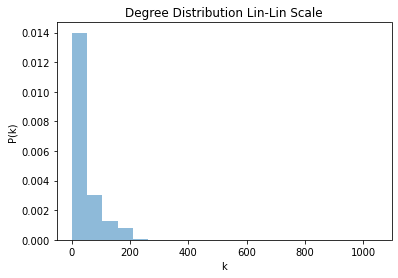

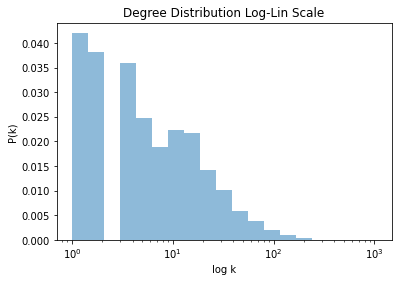

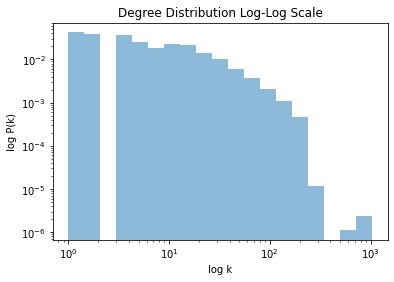

In [ ]:
# Facebook Friendship Graph
facebook_graph_degrees = facebook_graph.degree()
facebook_graph_degrees = [facebook_graph_degrees[i] for i in facebook_graph.nodes()]
plot_degree_distribution(facebook_graph_degrees, xscale='linear', yscale='linear')
plot_degree_distribution(facebook_graph_degrees, xscale='log', yscale='linear')
plot_degree_distribution(facebook_graph_degrees, xscale='log', yscale='log')

In [ ]:
def draw_communities(gr, greedy=True, node_size=100, gr_name='', randomized=False):
  if greedy:
    coms = nxcom.greedy_modularity_communities(gr)
  else:
    coms = list(nxcom.label_propagation_communities(gr))
    
  color_dict = {}
  for com in coms:
    color = tuple([random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)])
    for item in com:
      color_dict[item] = color
  colors = []
  for node in gr.nodes():
    colors.append(color_dict[node])

  plt.title(f"{'Randomized' if randomized else ''} {gr_name} Network: {len(coms)} {'greedy modular' if greedy else 'label propagation'} communities")
  nx.draw(gr, pos=nx.spring_layout(gr), node_color=colors, node_size=node_size)
  plt.show()

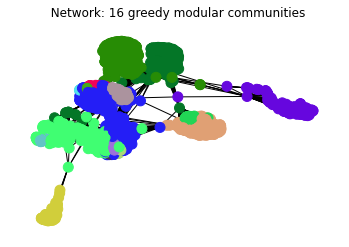

In [ ]:
draw_communities(facebook_graph)

In [ ]:
draw_communities(facebook_graph)